# Market Segmentation Analysis Study Report
## By - Utkarsh Balooni

### Step - 1: Deciding (not) to segment
#### Market segmentation requires a lot of the company's resources and capital. There are also a lot of implementation barriers involved with market segmentation.
#### To ensure that market segmentation will be profitable for McDonalds, it should consider the following:

- Market segmentation requires a lot of time, effort and open-mindedness from the organization.
- Ensure that there is effective communication across organizational units. Market segmentation is a holistic process and requires the co-operation of all units.
- Market segmentation requires a lot of funding. The organization should seriously consider the risk-reward ratio before investing in market segmentation.
- Market segmentation requires a long-term commitment from the senior management.The organization must ensure that the senior management in actively involved in the decision making process.
- The organization needs to put together a team of 2-3 people (segmentation team) to conduct the market segmentation analysis.



### Step - 2: Specifying the ideal target
#### In the next step McDonalds must choose the key features to define the market segments. There are 2 criteria to consider before asserting the profitability of a market segment:

- Knock-out criteria: Considers features like homogeneity,
distinctness, size, match, identifiability and reachability. Non-compliance with the knock-out criteria will lead to the automatic elimination of a market
segment.

- Attaractiveness criteria: The key features of the market segment are rated and a weight is assigned to each segment attractiveness
criteria by the team members.



### Step-3: Collecting Data
Before collecting data, the team must carefully study the segmentation criteria and agree on the segmentation variables. Geographic, sociodemographic, psychographic, and behavioral characteristics are the commonly used segmentation criteria.
- Geographic: The consumer's location data is used as the main criteria for segmentation. In most cases, this is the most appropriate choice.
- Socio Demographic: Typical socio-demographic segmentation criteria include age, gender, income and education. This is a more subjective approach.
- Psychographic: This segmentation criteria includes qualities like beliefs,
interests, preferences, aspirations, or benefits sought when purchasing a product. It is more complex than geographic and socio demographic segmentation.
- Behavioural: This method looks for similarities in behaviour/ reported behaviour. This is the most promising method but the data availabile for analysis is not always readily available.

In [69]:
#importing the necessary dependencies

import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.utils import resample
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.mixture import BayesianGaussianMixture

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import jaccard_score

### Step-4: Exploring the data
#### The categorical data is encoded and the mean value of each attribute is presented.

#### Principal component analysis is carried out and nearly 50% of the variance in the data is explained by the first 2 principal components.

#### Perceptual and heat map for the data is also shown.

In [24]:
#loading the dataset
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

df = pd.read_csv('/content/gdrive/MyDrive/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [47]:
#checking the dimensions of the dataset

df.shape

(1453, 15)

In [25]:
#encoding the categorical variables

df[df.columns[:11]] = OrdinalEncoder().fit_transform(df[df.columns[:11]])
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-3,61,Every three months,Female
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,+2,51,Every three months,Female
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,+1,62,Every three months,Female
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,+4,69,Once a week,Female
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,+2,49,Once a month,Male


In [26]:
#mean value of each attribute

df.mean(numeric_only = True)

yummy          0.552650
convenient     0.907777
spicy          0.093599
fattening      0.867171
greasy         0.526497
fast           0.900206
cheap          0.598761
tasty          0.644184
expensive      0.357880
healthy        0.198899
disgusting     0.242946
Age           44.604955
dtype: float64

In [27]:
#explained variance of each principal component

X = df[df.columns[:11]]

pca = PCA()
pca.fit(X)

pd.DataFrame({'Standard Deviation':np.sqrt(pca.explained_variance_),
                    'Proportion of Variance':np.array(pca.explained_variance_ratio_),
                    'Cumulative Proportion':np.array(np.cumsum(pca.explained_variance_ratio_))
                   },
                  index = ['PC1',"PC2",'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [28]:
#factor loadings of all features

pd.DataFrame(pca.components_.T,index = df.columns[:11],
                   columns = ['PC1',"PC2",'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


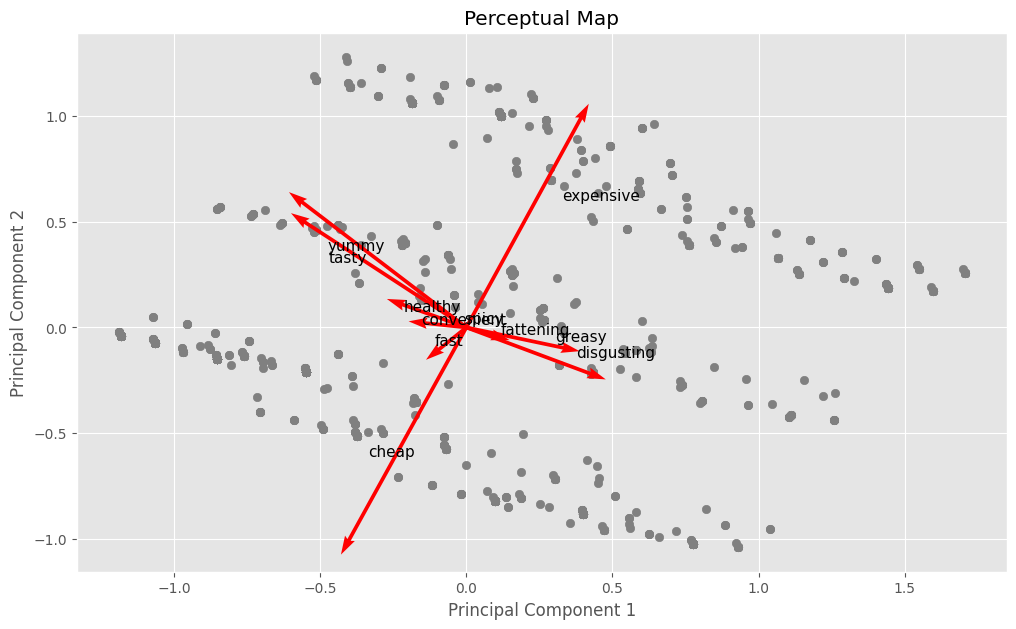

In [29]:
#perceptual map

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

cols=df.columns[:11]

plt.figure(figsize=(12,7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Perceptual Map')
plt.grid(True)

origin = [0, 0]
i=0
for component in pca.components_.T:
    plt.quiver(*origin, component[0], component[1], color='red', scale=2.5, width=0.004)
    plt.text(component[0], component[1], cols[i], color='black', fontsize=11)
    i+=1
plt.show()

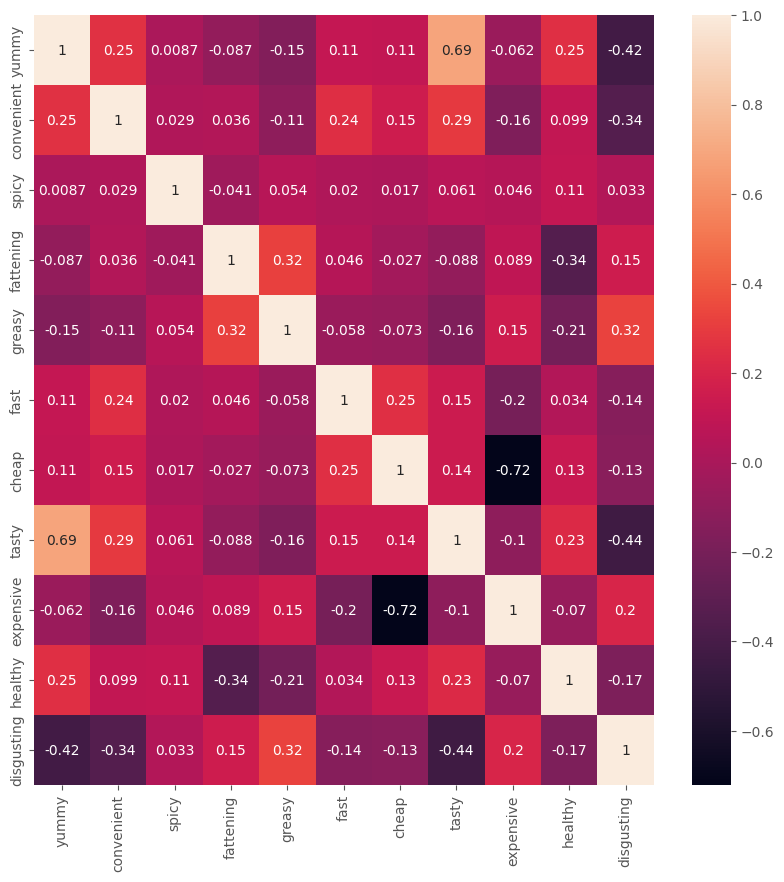

In [30]:
#heatmap for correlation

plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True);

### Step-5: Extracting segments
K-Means is used for clustering. The number of clusters are analysed using gorge plots, global stability analysis (adjusted rand index) and segment level stability analysis (Jaccard score).

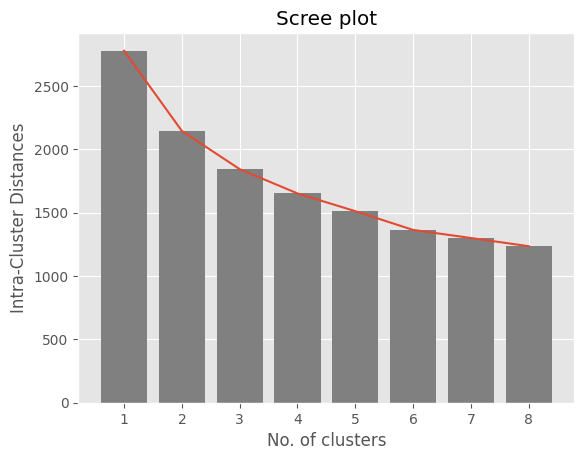

In [31]:
#using k-means to cluster the data and plotting the scree plot

intra_distance = []
clusters=[i for i in range(1,9)]
for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster, n_init = 'auto', init='random',max_iter=10, random_state=42)
    kmeans.fit(X)
    intra_distance.append(kmeans.inertia_)

plt.style.use('ggplot')
plt.bar(x=clusters,height=intra_distance,color='grey')
plt.xlabel('No. of clusters')
plt.ylabel('Intra-Cluster Distances')
plt.title('Scree plot')
plt.plot(clusters,intra_distance);

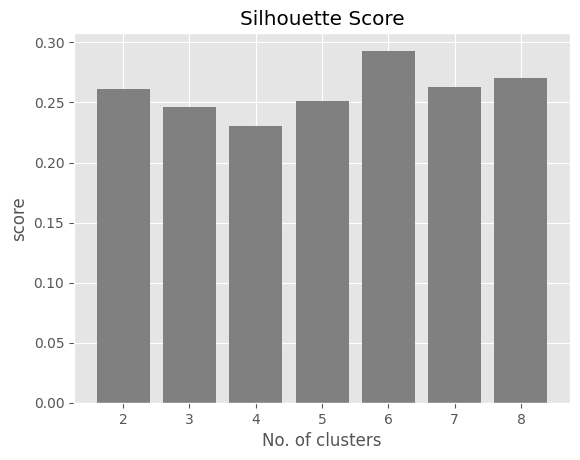

In [32]:
sil_scores=[]

clusters=[i for i in range(2,9)]
for cluster in clusters:
    kmeans=KMeans(n_clusters=cluster, n_init='auto', init='random',max_iter=10, random_state=42)
    kmeans.fit(X)
    tr=kmeans.labels_
    sil_scores.append(silhouette_score(X,tr,sample_size=100))

plt.bar(x=clusters,height=sil_scores,color='grey')
plt.xlabel('No. of clusters')
plt.ylabel('score')
plt.title('Silhouette Score');

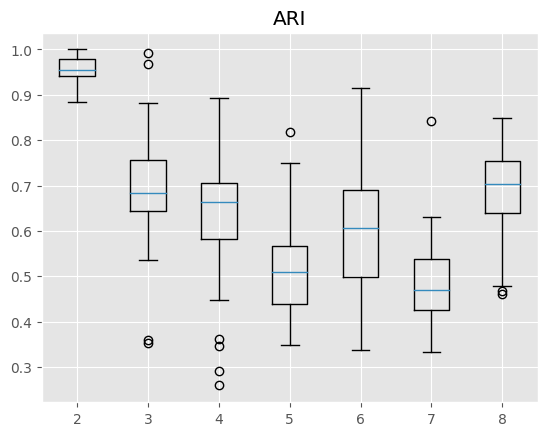

In [33]:
#Adjusted rand score for all clusters using True labels

rand_scores=[]

for cluster in clusters:
    scores=[]
    kmeans = KMeans(n_clusters = cluster, n_init = 'auto', init='random',max_iter=10, random_state=42)
    kmeans.fit(X)
    true_labels = kmeans.labels_

    X_new=X.copy()
    X_new['true']=true_labels

    for i in range(50):
        bootstrap_data = resample(X_new,replace=True,n_samples=600)

        kmeans_bs = KMeans(n_clusters=cluster,n_init='auto', init='random',max_iter=10)
        kmeans_bs.fit(bootstrap_data.drop('true',axis=1))
        pred_labels = kmeans_bs.labels_

        scores.append(adjusted_rand_score(pred_labels,bootstrap_data['true']))

    rand_scores.append(scores)

plt.boxplot(rand_scores)
plt.xticks(range(1,8),clusters)
plt.title('ARI');

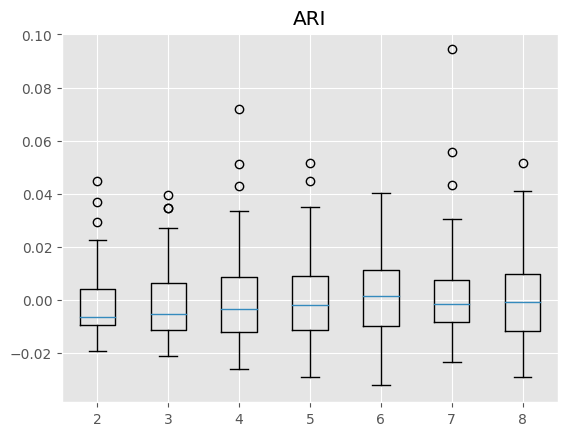

In [34]:
#Adjusted rand score for all clusters using 2 sets of bootstrapped values

rand_scores=[]

for cluster in clusters:
    scores=[]

    for i in range(100):
        data1 = resample(X,replace=True,n_samples=100)
        data2 = resample(X,replace=True,n_samples=100)

        k1 = KMeans(n_clusters=cluster,n_init='auto', init='random',max_iter=10)
        k1.fit(data1)

        k2= KMeans(n_clusters=cluster,n_init='auto', init='random',max_iter=10)
        k2.fit(data2)

        scores.append(adjusted_rand_score(k1.labels_,k2.labels_))

    rand_scores.append(scores)

plt.boxplot(rand_scores)
plt.xticks(range(1,8),clusters)
plt.title('ARI');

In [35]:
# calculating similarities using distances of each consumer to all segment respresentatives.

kmeans = KMeans(n_clusters = 4, n_init = 'auto', init='random',max_iter=10, random_state=42)
kmeans.fit(X)

sims = []
for point in np.array(X):
    distances = [math.dist(point, center) for center in kmeans.cluster_centers_]
    total_sum = np.sum(np.exp(-np.array(distances)))
    similarities = [np.exp(-d) / total_sum for d in distances]
    sims.append(similarities)

sims=np.array(sims)
np.sum(sims,axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

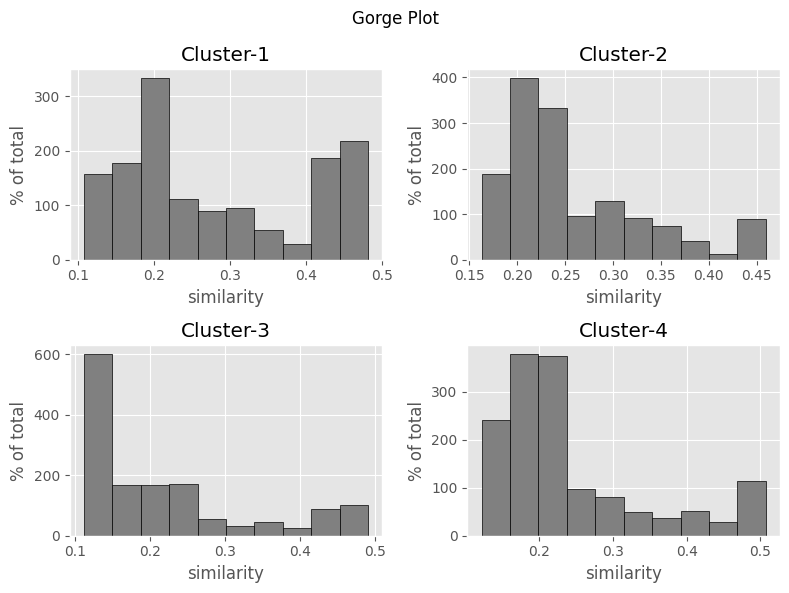

In [36]:
#gorge plot using similarities

c1, c2, c3, c4 = sims[:, 0], sims[:, 1], sims[:, 2], sims[:, 3]

plt.figure(figsize=(8, 6))
plt.suptitle('Gorge Plot')


plt.subplot(2, 2, 1)
plt.hist(c1, bins=10,color='grey',edgecolor='black')
plt.xlabel('similarity')
plt.ylabel('% of total')
plt.title('Cluster-1')

plt.subplot(2, 2, 2)
plt.hist(c2, bins=10,color='grey',edgecolor='black')
plt.xlabel('similarity')
plt.ylabel('% of total')
plt.title('Cluster-2')

plt.subplot(2, 2, 3)
plt.hist(c3, bins=10,color='grey',edgecolor='black')
plt.xlabel('similarity')
plt.ylabel('% of total')
plt.title('Cluster-3')

plt.subplot(2, 2, 4)
plt.hist(c4, bins=10,color='grey',edgecolor='black')
plt.xlabel('similarity')
plt.ylabel('% of total')
plt.title('Cluster-4')

plt.tight_layout()

plt.show()

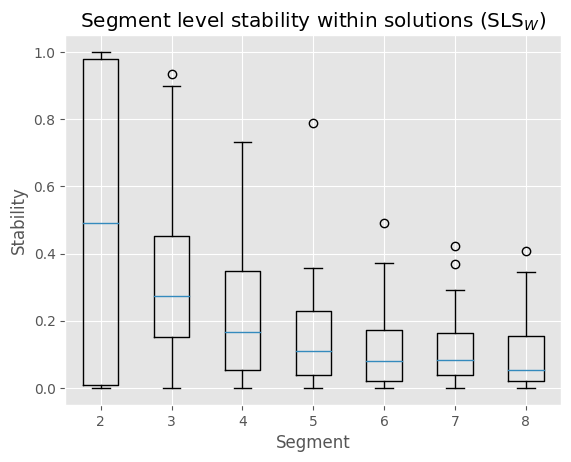

In [37]:
#Segment level stability within solutions using jaccard score

jaccard_scores=[]

for cluster in clusters:
    scores=[]
    kmeans = KMeans(n_clusters = cluster, n_init = 'auto', init='random',max_iter=10, random_state=42)
    kmeans.fit(X)
    true_labels = kmeans.labels_

    X_new=X.copy()
    X_new['true']=true_labels

    for i in range(100):
        bootstrap_data = resample(X_new,replace=True,n_samples=300)

        kmeans_bs = KMeans(n_clusters=cluster,n_init='auto', init='random',max_iter=10)
        kmeans_bs.fit(bootstrap_data.drop('true',axis=1))
        pred_labels = kmeans_bs.labels_

        scores.append(jaccard_score(pred_labels,bootstrap_data['true'],average='weighted'))

    jaccard_scores.append(scores)

plt.boxplot(jaccard_scores)
plt.xticks(range(1,8),clusters)
plt.xlabel('Segment')
plt.ylabel('Stability')
plt.title('Segment level stability within solutions (SLS$_W$)');

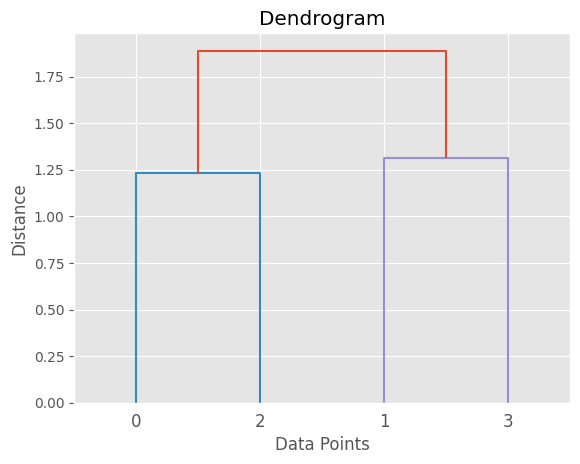

In [38]:
#dendrogram for 4 segment clustering

kmeans = KMeans(n_clusters=4, n_init='auto', random_state=21, init='random', max_iter=10)
clusters = kmeans.fit_predict(X)

cluster_centers = kmeans.cluster_centers_

dist_matrix = pdist(cluster_centers)

linkage_matrix = linkage(dist_matrix, method='ward')

dendrogram(linkage_matrix)

plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')

plt.show()

#### We also use the Bayesian Gaussian Mixture model which uses the EM algorithm to cluster the data points.


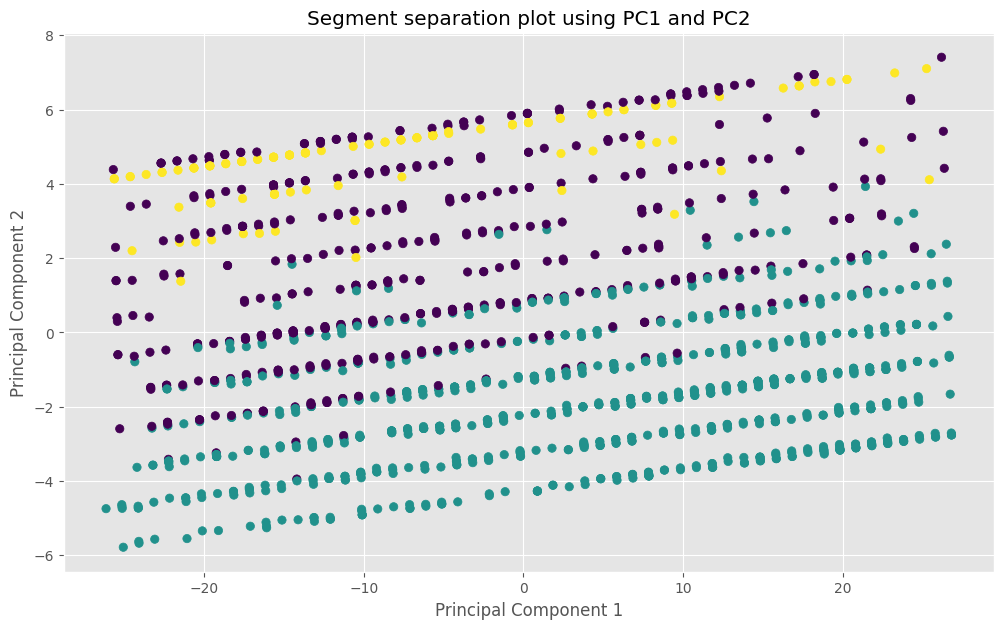

In [75]:
model = BayesianGaussianMixture(n_components=3, covariance_type='diag', weight_concentration_prior_type='dirichlet_process', max_iter=1000)
model.fit(X)

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

cols=df.columns[:11]

plt.figure(figsize=(12,7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=model.predict(X))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment separation plot using PC1 and PC2');

### Step-6: Segment profiling
Different features for each market segment are shown. Inference about the features characteristic to each market segment is made.

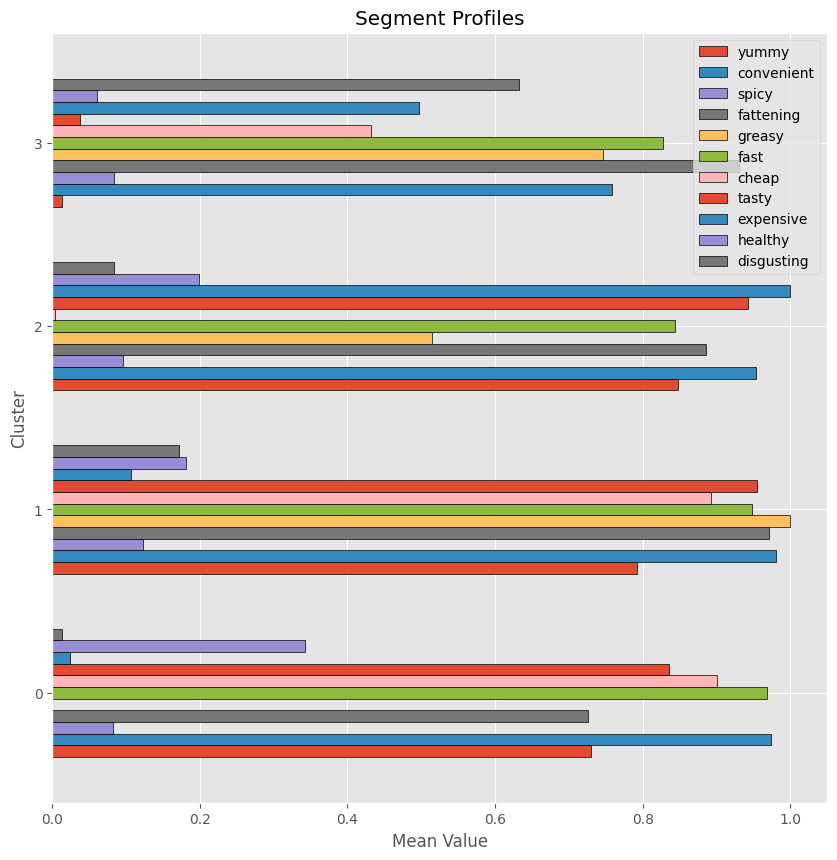

In [39]:
#segment profiling

kmeans = KMeans(n_clusters=4, n_init='auto', random_state=32, init='random', max_iter = 10)
kmeans.fit(X)

X_lab=X.copy()
X_lab['clusters']=kmeans.labels_

seg_profile = X_lab.groupby('clusters').mean()

seg_profile.plot(kind='barh' , width=0.7, figsize=(10,10), edgecolor='black')
plt.ylabel('Cluster')
plt.xlabel('Mean Value')
plt.title('Segment Profiles')
plt.legend(loc='best')

plt.show()

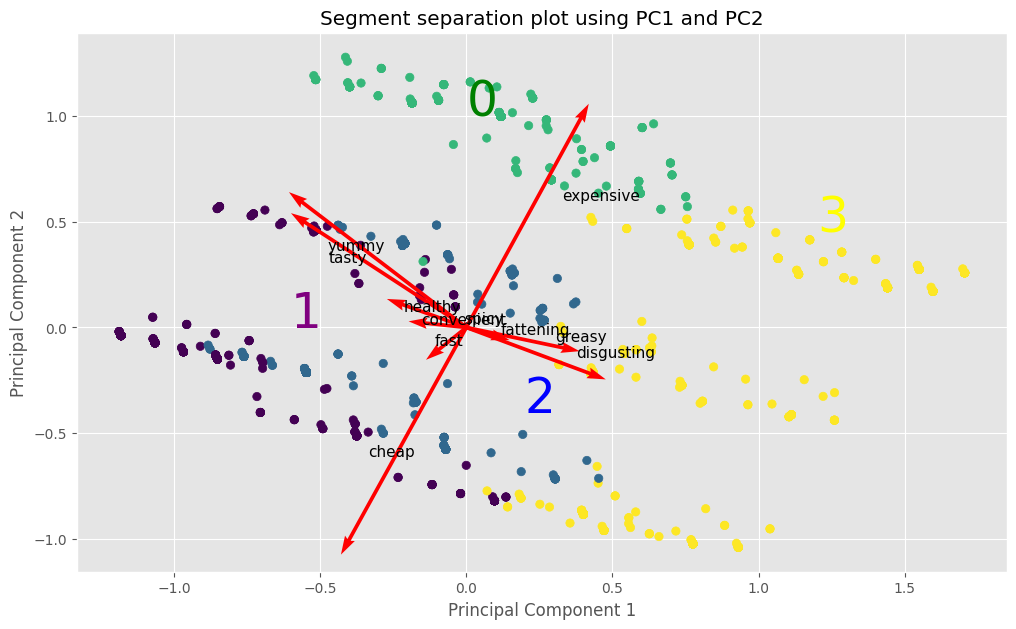

In [40]:
#perceptual map using segment profiling

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

cols=df.columns[:11]

plt.figure(figsize=(12,7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=X_lab['clusters'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment separation plot using PC1 and PC2')
plt.text(0,1,'0',fontsize=35, color = 'green')
plt.text(1.2,0.45,'3',fontsize=35, color = 'yellow')
plt.text(0.2,-0.4,'2',fontsize=35, color = 'blue')
plt.text(-0.6,0,'1',fontsize=35, color = 'purple')
plt.grid(True)

origin = [0, 0]
i=0
for component in pca.components_.T:
    plt.quiver(*origin, component[0], component[1], color='red', scale=2.5, width=0.004)
    plt.text(component[0], component[1], cols[i], color='black', fontsize=11)
    i+=1

plt.show()

### Step-7: Describing Segments
Mosaic plot for gender, visit frequency vs cluster number is shown.

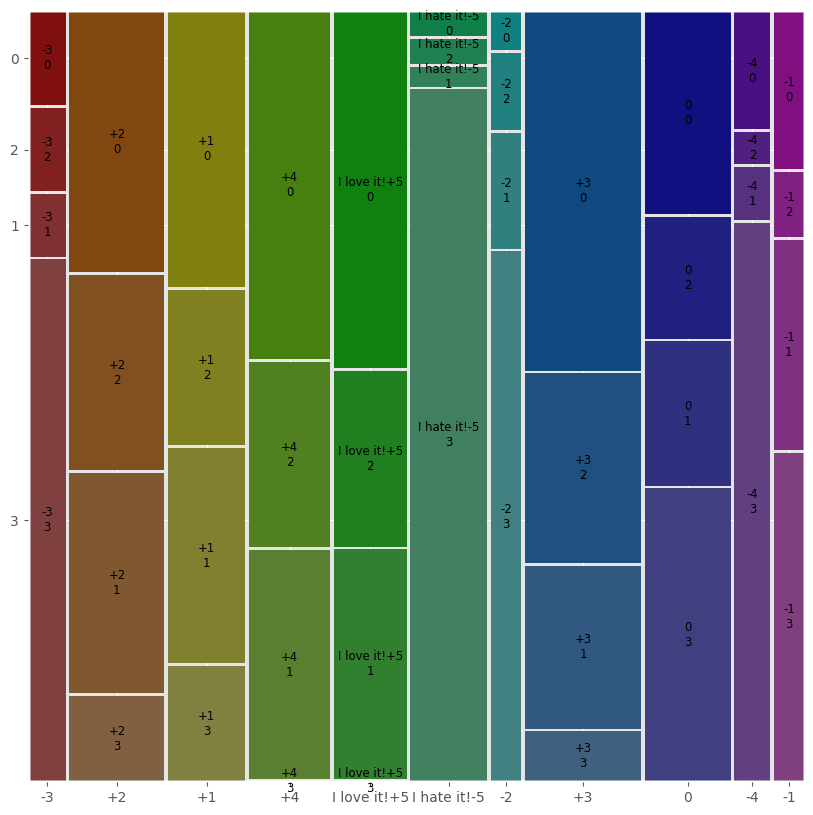

In [41]:
#mosaic plot for Likes

df_lab=df.copy()
df_lab['cluster'] = kmeans.labels_

plt.rcParams['figure.figsize']=(10,10)
mosaic(df_lab,['Like','cluster']);

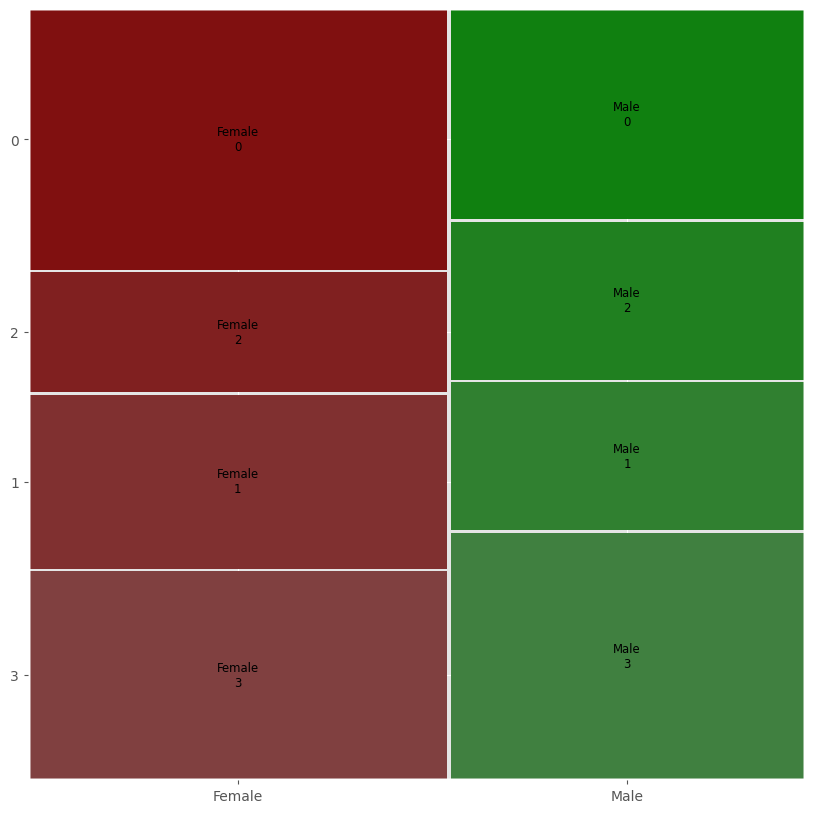

In [42]:
#mosaic plot for gender

plt.rcParams['figure.figsize']=(10,10)
mosaic(df_lab,['Gender','cluster']);

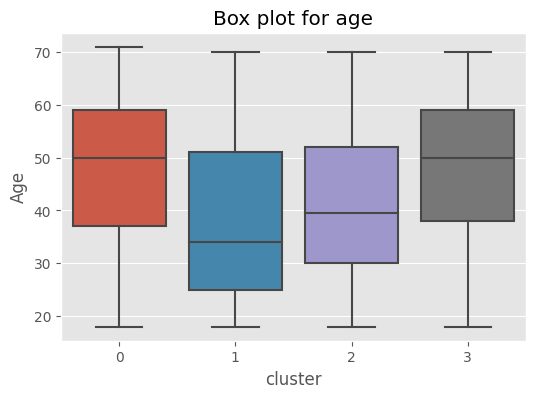

In [43]:
#box plot for age for different segments

plt.figure(figsize=(6,4))
sns.boxplot(x='cluster', y='Age', data=df_lab)
plt.title('Box plot for age');

### Step-8: Selecting the target segment

In [44]:
#fitting a decision tree classifier on the data

df_lab['Like'] = df_lab['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df_lab['VisitFrequency'] = df_lab['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df_lab['cluster'] = df_lab['cluster'].replace({3:1,1:0,2:0})

X = df_lab[['Like', 'Age', 'VisitFrequency']]
y = df_lab['cluster']

dtc = DecisionTreeClassifier(random_state=12, max_depth = 3)
dtc.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=12)

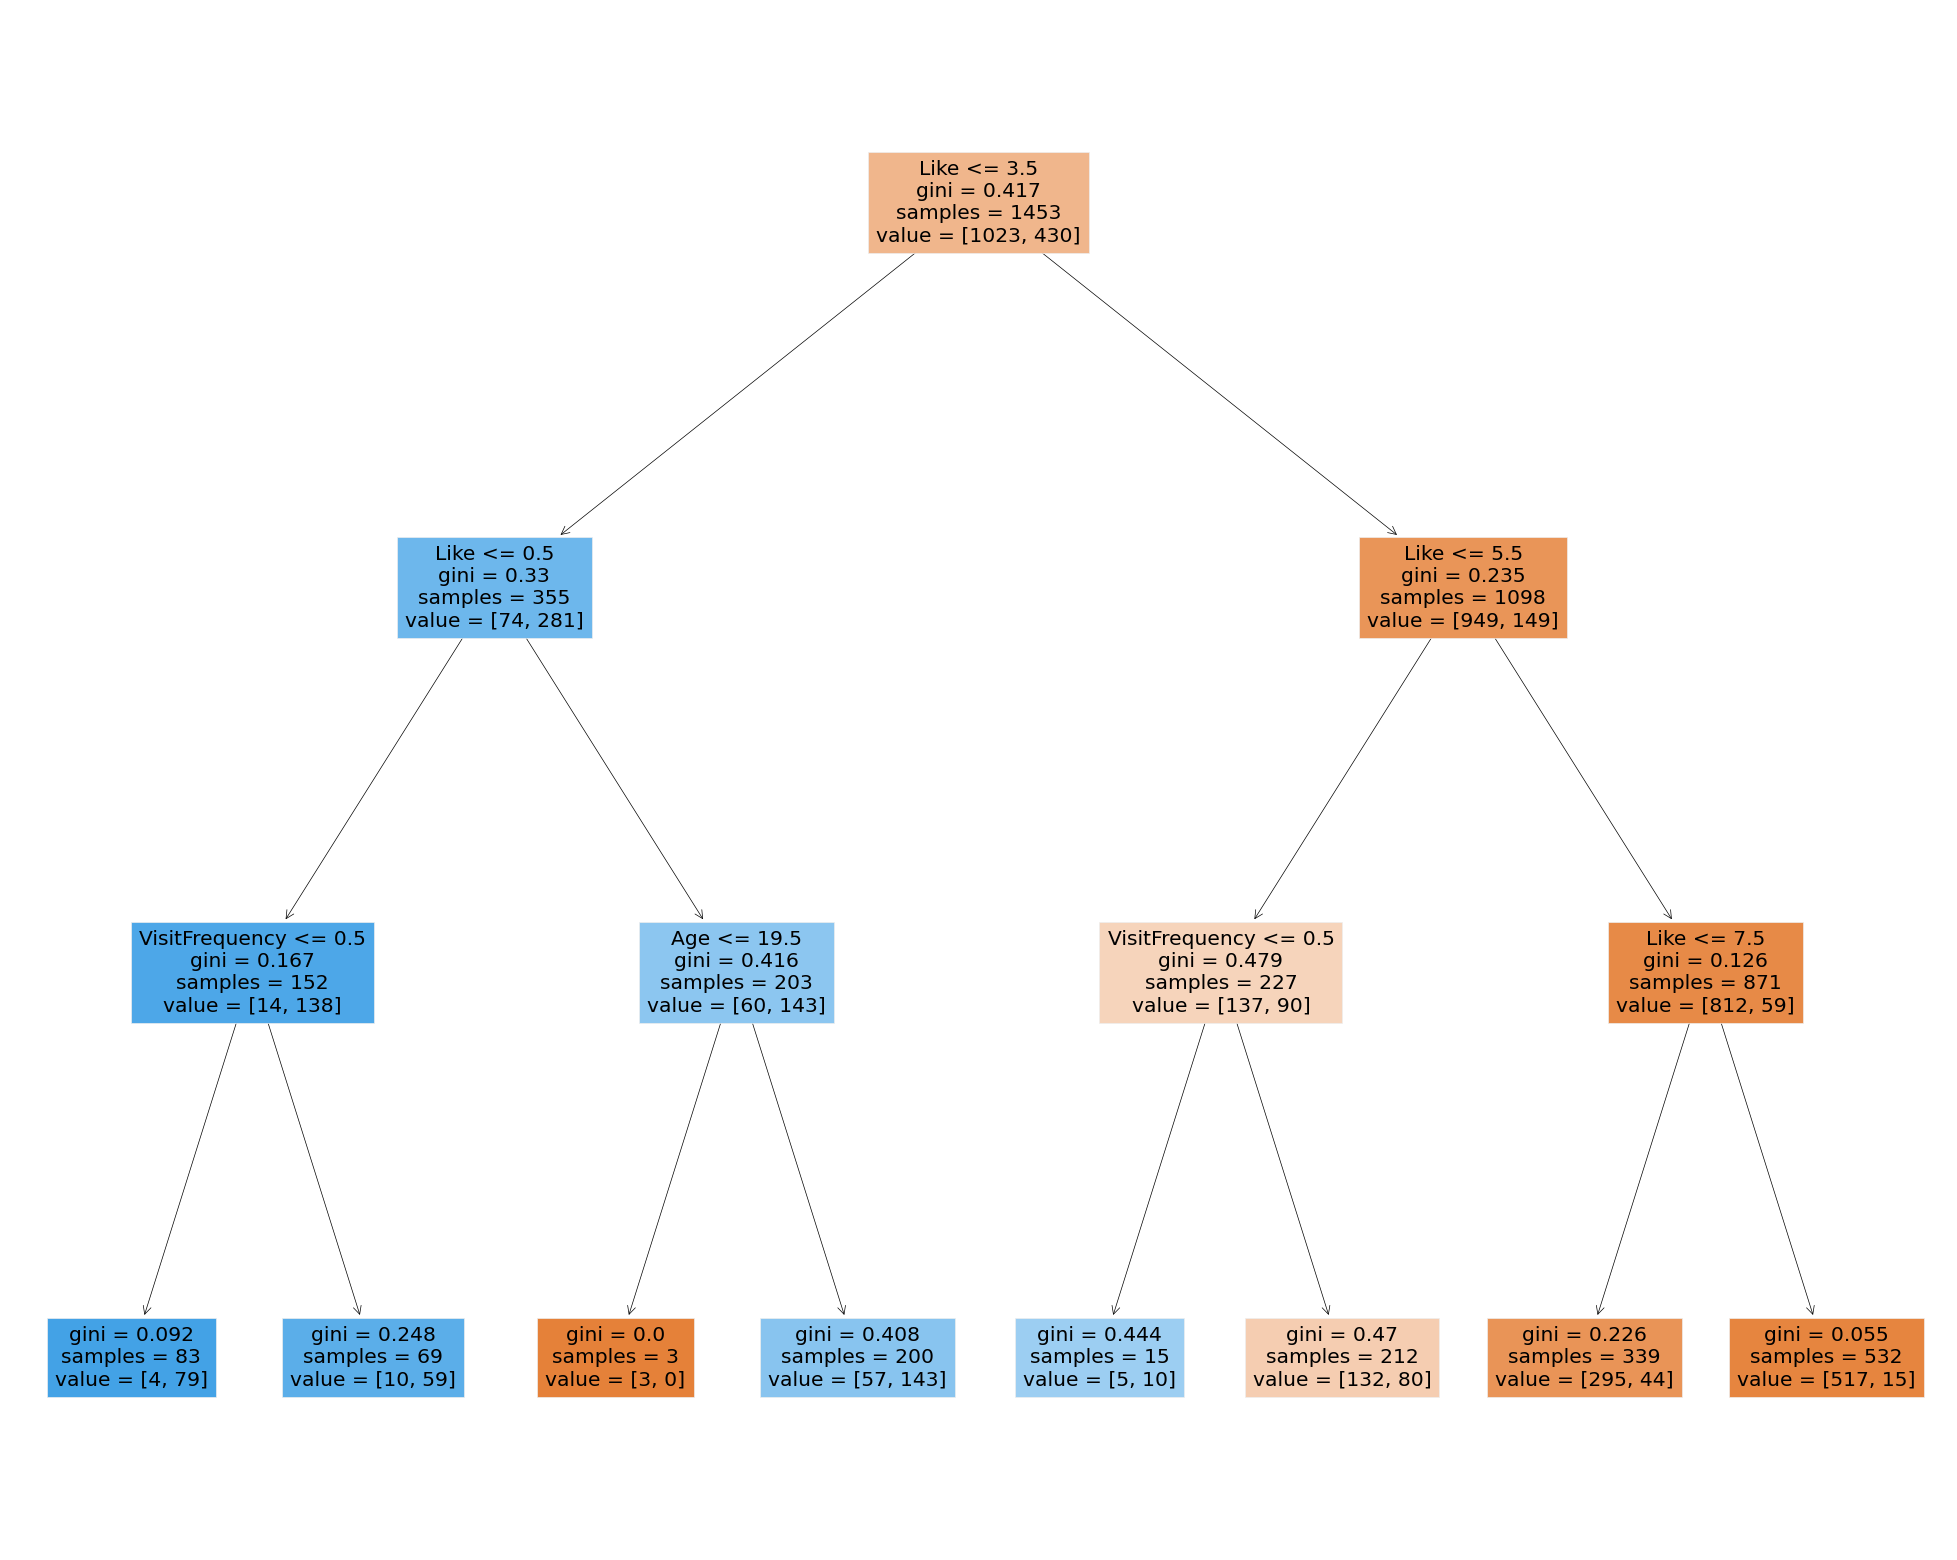

In [45]:
#visualizing the tree

fig = plt.figure(figsize=(25,20))
tr = tree.plot_tree(dtc, filled=True,feature_names=X.columns)

In [48]:

import numpy as np

# Fit Bayesian Gaussian Mixture Model
n_components = 3
model = BayesianGaussianMixture(n_components=n_components, covariance_type='diag', weight_concentration_prior_type='dirichlet_process')
model.fit(X)

# Get the predicted cluster labels
labels = model.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
